In [1]:
%pylab inline
from teaching.bilan_cptces import result_eval, gather_results, bilan_pupil, make_bilan_cptces

Populating the interactive namespace from numpy and matplotlib


In [81]:
def stat(n_nonanswered, points):
    N = 67
    n_done = N - n_nonanswered
    print("eta : {:.0f}".format(points/n_done * 100))
    print("tau : {:.0f}".format(n_done/N*100))
    return

stat(33,10)

eta : 29
tau : 51


#################################################
NOM                PRÉNOM         NOTE CLASSEMENT
#################################################
ABDOURAHMAN        Gad            11.6          4
AHMANE             Amar           15.2          1
BEKKARI            Salah-Eddine   ***** ABSENT **
BELLANGER          Maxence         7.0         15
BENSIDHOUM         Nicolas         3.6         37
BERLUREAU          Pierre-Gabriel 10.0          7
BOUSSAID BENCHAARA Rodaina         3.9         35
CAPUANO            Matteo          6.6         19
CHEAV              Khemra         ***** ABSENT **
CHEBBI             Emir            1.5         43
CICEK              Hakan           8.4         11
COLLET             Nathan          6.6         19
CORTEEL            Blandine        9.4          9
DALLA CORTE        Gabriel        11.9          3
DELFOUR            Matteo         10.0          7
EL SISI            Célina          4.9         26
ELMENSHAWY         Shemseddine     5.4         24


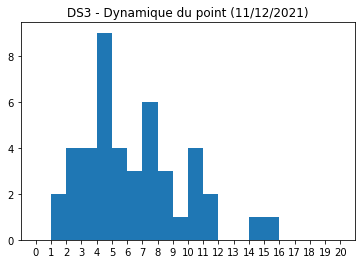

In [92]:
# Pour le bilan d'une évaluation

result = result_eval("ds3", display=True)

In [148]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

folder = "/Users/remimetzdorff/Documents/GitHub/enseignements/2021-2022_cpge_paul_valery_paris/classe/"

class eleve():
    def __init__(self, name):
        self.df        = pd.read_excel(folder+"eleve.xlsx", sheet_name="eleve",index_col="Nom")
        self.name      = name
        self.firstname = self.df.loc[self.name].Prénom
        self.num       = self.df.loc[self.name].Num 
        return
    
    def _eval_cptce(self,eval_type,n):
        """Mets à jour les résultats d'un élève sur une évaluation par compétence"""
        if eval_type not in ["ds", "dm", "tp"]:
            print("Unknwon eval_type")
            return
        filename = eval_type+".xlsx"
        
        self.dfeval = pd.read_excel(folder+filename, sheet_name=eval_type+str(n),index_col="Nom", header=1)
        self.dfeval = self.dfeval.fillna(0)
        barem = self.dfeval.iloc[0]
        self.barem_app = barem.loc["APP"]
        self.barem_ana = barem.loc["ANA"]
        self.barem_rea = barem.loc["REA"]
        self.barem_val = barem.loc["VAL"]
        self.barem_com = barem.loc["COM"]
        self.barem_rco = barem.loc["RCO"]
        self.barem_auto = barem.loc["AUTO"]
        self.barem_tot = self.barem_app + self.barem_ana + self.barem_rea + self.barem_val + self.barem_com + self.barem_rco + self.barem_auto
        
        result = self.dfeval.loc[self.name]
        if result.loc["Abs"] == "Abs":
            self.abs = True
        else:
            self.abs = False
        self.app = result.loc["APP"]
        self.ana = result.loc["ANA"]
        self.rea = result.loc["REA"]
        self.val = result.loc["VAL"]
        self.com = result.loc["COM"]
        self.rco = result.loc["RCO"]
        self.auto = result.loc["AUTO"]
        self.tot = self.app + self.ana + self.rea + self.val + self.com + self.rco + self.auto
        
        self.note = self.tot / self.barem_tot * self.barem_final
        return
    
    def _eval_(self,eval_type,n):
        """Mets à jour les résultats d'un élève sur une évaluation standard"""
        if eval_type not in ["interro", "colle"]:
            print("Unknwon eval_type")
            return
        filename = eval_type+".xlsx"
        self.dfeval = pd.read_excel(folder+filename, sheet_name=eval_type,index_col="Nom", header=1)
        self.dfeval = self.dfeval.fillna(0)
        barem = self.dfeval.iloc[0]
        return
    
    def ds(self,n):
        self.barem_final = 20
        self._eval_cptce("ds",n)
        return
    
    def dm(self,n):
        self.barem_final = 20
        self._eval_cptce("dm",n)
        return
    
    def tp(self,n):
        self.barem_final = 20
        self._eval_cptce("tp",n)
        return
    
    def interro(self,n):
        self.barem_final = 10
        self._eval_cptce("interro",n)
        return
    
    def colle(self,n):
        self.barem_final = 20
        self._eval_cptce("colle",n)
        return

class classe():
    def __init__(self):
        self.df = pd.read_excel(folder+"eleve.xlsx", sheet_name="eleve",index_col="Nom")
        self.pupils = self.df.index
        return
    
    def results_eval_cptce(self, eval_type, n):
        self.app, self.ana, self.rea, self.val, self.com, self.rco, self.auto = [], [], [], [], [], [], []
        for name in self.pupils:
            pupil = eleve(name)
            getattr(pupil, eval_type)(n)
            if not pupil.abs:
                self.app.append(pupil.app)
                self.ana.append(pupil.ana)
                self.rea.append(pupil.rea)
                self.val.append(pupil.val)
                self.com.append(pupil.com)
                self.rco.append(pupil.rco)
                self.auto.append(pupil.auto)
        self.app = np.array(self.app)
        self.ana = np.array(self.ana)
        self.rea = np.array(self.rea)
        self.val = np.array(self.val)
        self.com = np.array(self.com)
        self.rco = np.array(self.rco)
        self.auto = np.array(self.auto)
        self.tot = self.app + self.ana + self.rea + self.val + self.com + self.rco + self.auto
                
        self.barem_app = pupil.barem_app
        self.barem_ana = pupil.barem_ana
        self.barem_rea = pupil.barem_rea
        self.barem_val = pupil.barem_val
        self.barem_com = pupil.barem_com
        self.barem_rco = pupil.barem_rco
        self.barem_auto = pupil.barem_auto
        self.barem_tot = pupil.barem_tot
        self.barem_final = pupil.barem_final
        
        self.note = self.tot / self.barem_tot * self.barem_final
        return
    
    def moyenne(eval_type, n):
        self.results_eval_cptce(eval_type, n)
        return self.note.mean()
        
class evaluation():
    def __init__(self, eval_type, n):
        self.eval_type = eval_type
        self.n = n
        self.name = eval_type+str(n)
        self.classe = classe()
        self.classe.results_eval_cptce(self.eval_type, self.n)
    
    @property
    def note(self):
        "moyenne de la classe sur cette évaluation"
        return self.classe.note.mean()
    
    @property
    def app(self):
        "taux de réussite moyen de la compétence APP"
        return self.classe.app.mean() / self.classe.barem_app
    @property
    def ana(self):
        "taux de réussite moyen de la compétence ANA"
        return self.classe.ana.mean() / self.classe.barem_ana
    @property
    def rea(self):
        "taux de réussite moyen de la compétence REA"
        return self.classe.rea.mean() / self.classe.barem_rea
    @property
    def val(self):
        "taux de réussite moyen de la compétence VAL"
        return self.classe.val.mean() / self.classe.barem_val
    @property
    def com(self):
        "taux de réussite moyen de la compétence COM"
        return self.classe.com.mean() / self.classe.barem_com
    @property
    def rco(self):
        "taux de réussite moyen de la compétence RCO"
        return self.classe.rco.mean() / self.classe.barem_rco
    @property
    def auto(self):
        "taux de réussite moyen de la compétence AUTO"
        return self.classe.auto.mean() / self.classe.barem_auto
        
mp2i = classe()
ds1 = evaluation("ds",1)
ds2 = evaluation("ds",2)

# Ça commence à ressembler à quelque chose
# Traiter le cas des colles et des interro qui ne sont pas par compétence
# Faire le bilan :
#    - par élève, sur un DS avec les diagrammes radars
#    - par élève, sur une série d'évaluations pour avoir la moyenne par type d'avluation et la progression
#    - pour la classe sur une série de DS
#    - distinguer les élèves spé SI et PC

In [151]:
ds2.note

9.590361445783133

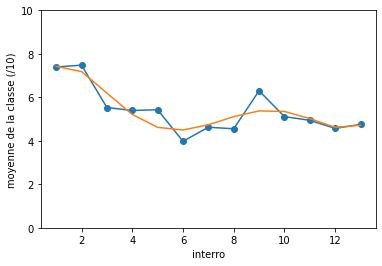

In [5]:
x = []

N = 13

for n in range(1,N+1):
    result = result_eval("interro{:g}".format(n), display=False)
    x.append(result[0]["moy_classe"]["total"] / result[0]["barem"]["total"] * 10)
    note, p = [], 0
    for r in result:
        if not r["eval"]["Abs"]:
            note.append(r["note"]["total"] / result[0]["barem"]["total"] * 10)
            p += 1
    #plt.plot(np.ones(p)*n, note, "oC0", alpha=.1)
    
n = arange(1,N+1)
plt.plot(n, x, "o-")
plt.ylim(0,10)
plt.xlabel("interro")
plt.ylabel("moyenne de la classe (/10)")

a,b,c,d,e,f = np.polyfit(n,x,5)
plt.plot(n, a*n**5 + b*n**4 +c*n**3 + d*n**2 + e*n + f)

plt.savefig("interro_period_1.png",dpi=300)

In [4]:
# Pour le bilan par élève sur une période donnée

ds = []
tp = []
colle = []
interro = ["interro1", "interro2", "interro3"]

evaluations = ds+tp+colle+interro
make_bilan_cptces(evaluations,remake_images=False)

/Users/remimetzdorff/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/remimetzdorff/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


'temp.tex'

In [62]:
notes_interro = [6.66,7.48,4.43,4.86,4.89,4.07]
barem_interro = [9,10,8,9,9,10]

coeff_colle   = 2
coeff_interro = .5
coeff_dm      = .25
coeff_tp      = 1
coeff_ds      = 5

moy_colle     = 12.5
moy_interro   = np.mean(notes_interro)/np.mean(barem_interro) * 20
moy_dm        = 12
moy_tp        = 14.23
moy_ds        = 9.5

moy = (coeff_colle*moy_colle + coeff_interro*moy_interro + coeff_dm*moy_dm + coeff_tp*moy_tp + coeff_ds*moy_ds) / (coeff_colle+coeff_interro+coeff_dm+coeff_tp+coeff_ds)
print(moy)

10.927896103896105


In [161]:
u = np.zeros(N)
for k in range(N):
    u[k]

In [90]:
6.4*1.41

9.024